In [1]:

#importing usefull library
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

#importing some custom function
from scripts import make_fig
from scripts import utilities



In [2]:
#import new data
in_file = 'increase_concentration/combined/txt/proteinGroups.txt'
test_df = pd.read_csv(in_file, sep='\t')
df = utilities.clean(test_df)
df['prot_id']=[utilities.clean_id(n) for n in df['Protein IDs']]
df.set_index('prot_id',inplace=True)
dsc_diz_8 = dict(zip(df.index.values, test_df['Fasta headers']))
df_8 = utilities.get_data(df, 'LFQ intensity ', '', np.arange(1,11,1))
df_8.head()

removed  108 Only identified by site
tot  108  entries removed
---------------
removed  34 Reverse
tot  142  entries removed
---------------
removed  52 Potential contaminant
tot  194  entries removed
---------------
removed  458 Peptide counts (unique)
tot  652  entries removed
---------------
got:  2983 protein now


,LFQ intensity 1,LFQ intensity 2,LFQ intensity 3,LFQ intensity 4,LFQ intensity 5,LFQ intensity 6,LFQ intensity 7,LFQ intensity 8,LFQ intensity 9,LFQ intensity 10
prot_id,,,,,,,,,,
Tb927.5.4450,0,19087000,32017000,24320000,22521000,14483000,0,0,0,0
Tb927.5.4460,964920000,358230000,109250000,42627000,19150000,0,0,0,0,0
Tb927.5.4480,103910000,72221000,44635000,34392000,27449000,24625000,0,0,0,0
Tb927.5.4500,61167000,65243000,66910000,79501000,97954000,76544000,50579000,96265000,85605000,136910000
Tb927.5.4560,98074000,127690000,172990000,148380000,142590000,206120000,284880000,147090000,80225000,67946000


In [3]:
#import old data and remove rubbish entires
in_file = 'test_small/proteinGroups.txt'
test_df = pd.read_csv(in_file, sep='\t')
df = utilities.clean(test_df)
df['prot_id']=[utilities.clean_id(n) for n in df['Protein IDs']]
df.set_index('prot_id',inplace=True)
dsc_diz_4 = dict(zip(df.index.values, test_df['Fasta headers']))
df_4 = utilities.get_data(df, 'LFQ intensity ', '', np.arange(1,11,1))
df_4.head()



removed  44 Only identified by site
tot  44  entries removed
---------------
removed  29 Reverse
tot  73  entries removed
---------------
removed  32 Potential contaminant
tot  105  entries removed
---------------
removed  655 Peptide counts (unique)
tot  760  entries removed
---------------
got:  2241 protein now


,LFQ intensity 1,LFQ intensity 2,LFQ intensity 3,LFQ intensity 4,LFQ intensity 5,LFQ intensity 6,LFQ intensity 7,LFQ intensity 8,LFQ intensity 9,LFQ intensity 10
prot_id,,,,,,,,,,
Tb04.24M18.150,0,0,0,0,4696300,5114200,7439000,8617200,0,0
Tb927.5.4460,230210000,56865000,23886000,11174000,5188500,0,0,0,0,0
Tb927.5.4480,55868000,54596000,23487000,11130000,0,0,0,0,0,0
Tb927.5.4360,0,0,0,0,0,0,0,6941700,0,0
Tb927.5.4560,0,0,20892000,26086000,52089000,42673000,22828000,0,0,0


In [51]:
#the dataset does not need cleaning
#we extract 48 columns from the average of 4 replicates of the SEC 1000
in_file = 'test_small/Thomas_sec300/LFQ-intensity-E3017-E3019-E3021-E3023_0_0_0.6.txt'
df = pd.DataFrame.from_csv(in_file, sep='\t')#a look the the daa
df_sec300 = df.iloc[:,0:48]
df_sec300.head()

d:\my_env\prediction\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,...,median_39,median_40,median_41,median_42,median_43,median_44,median_45,median_46,median_47,median_48
Tb927.10.3210,688310000.0,276010000.0,215760000.0,199840000.0,171215000.0,190955000.0,93088000.0,139705000.0,176220000.0,202745000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41560000.0,1.258930e+09,693180000.0,2.658850e+09
Tb927.5.2310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
Tb927.8.7570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
Tb927.3.3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202145000.0,329270000.0,253550000.0,165110000.0,0.0,91555000.0,0.0,0.000000e+00,0.0,0.000000e+00
Tb927.7.5640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,451700000.0,428980000.0,248410000.0,217445000.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00


## How many proteins are in common between the two datasets?


In [56]:
common = set(df_4.index.values) & set(df_8.index.values)
print('4mn dataset:', len(set(df_4.index.values)))
print('8mn dataset:', len(set(df_8.index.values)))
print('common:', len(common))
# we will focus the analysis only on the protein in common
df_4=df_4.loc[common]
df_8=df_8.loc[common]
df_sec300=df_sec300.loc[common]
df_sec300.dropna(inplace=True)
print('sec300:',df_sec300.shape[0])

4mn dataset: 1971
8mn dataset: 1971
common: 1971
sec300: 1651


d:\my_env\prediction\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


d:\my_env\prediction\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


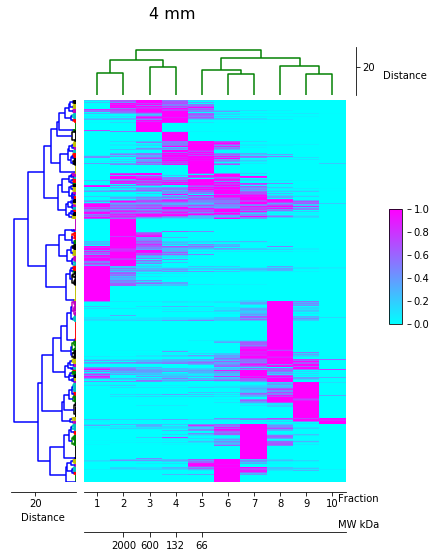

In [12]:
#create the plot
den_rows = make_fig.plot_experiment(
     df_4.apply(utilities.norm_max,1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 1,
     title='4 mm',
     fig_name = 'Fernando_4.png',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      2:'2000', 
                      3:'600', 
                      4:'132', 
                      5:'66', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False,
    owerwrite_order=False,
     )


d:\my_env\prediction\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


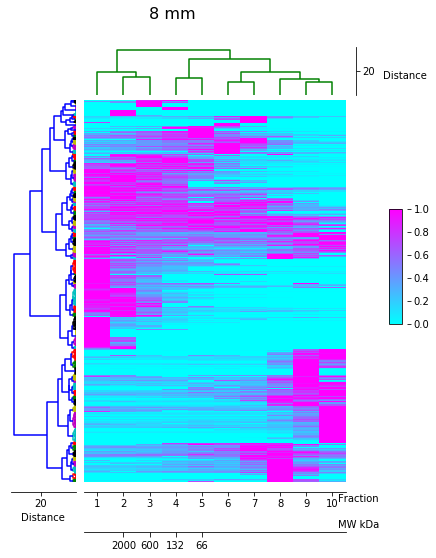

In [13]:
#create the plot
tt=make_fig.plot_experiment(
     df_8.apply(utilities.norm_max,1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 1,
     title='8 mm',
     fig_name = 'Fernando_8.png',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      2:'2000', 
                      3:'600', 
                      4:'132', 
                      5:'66', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False,
    #owerwrite_order=den_rows,
     )


## In which fraction do the proteins pecks?

In [57]:
df_sec300['max'] = df_sec300.apply(np.argmax, axis=1)
df_sec300['max'] = [int(n.split('_')[-1]) for n in df_sec300['max']]


d:\my_env\prediction\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [14]:
df_8['max'] = df_8.apply(np.argmax, axis=1)

d:\my_env\prediction\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [16]:
df_4['max'] = df_4.apply(np.argmax, axis=1)

d:\my_env\prediction\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [21]:
df_8['max'] = [int(n.split(' ')[-1]) for n in df_8['max']]
df_4['max'] = [int(n.split(' ')[-1]) for n in df_4['max']]

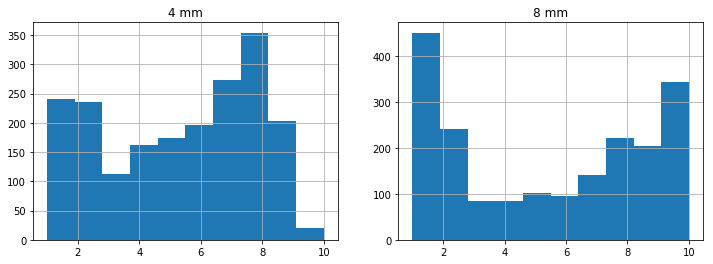

In [30]:
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
df_4['max'].hist(ax=axes[0])
df_8['max'].hist(ax=axes[1])
axes[0].set_title('4 mm')
axes[1].set_title('8 mm')
plt.show()

## How the proteins move between the two dataset

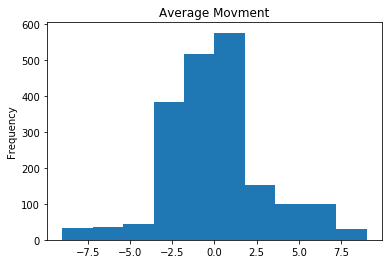

In [36]:
diff = df_4['max']-df_8['max']
diff.plot(kind='hist')
plt.title('Average Movment')
plt.show()

## A group of proteins move in the HMW fractions, is this supported by the SEC300 dataset

In [63]:
from scipy import signal
del df_sec300['max']
df_sec300['peakind']=[signal.find_peaks_cwt(df_sec300.loc[data].values, [4,5]) for data in df_sec300.index.values]
df_sec300.head()

,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,...,median_40,median_41,median_42,median_43,median_44,median_45,median_46,median_47,median_48,peakind
Tb927.4.4940,110382000.0,150695000.0,126105000.0,123620000.0,146505000.0,115550000.0,127315000.0,130985000.0,96254500.0,91524500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[5]
Tb927.10.7740,36449000.0,80091500.0,65621000.0,61730500.0,80644000.0,68853000.0,79448500.0,67789000.0,27776500.0,20107500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[5, 33]"
Tb927.7.2310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2714900.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[36]
Tb927.11.7560,658955000.0,392180000.0,127593500.0,29514000.0,31729500.0,12555150.0,15838950.0,29562500.0,50582500.0,40025000.0,...,468155000.0,217585000.0,96514500.0,45240000.0,65159500.0,114101500.0,72934000.0,99153500.0,201455000.0,"[1, 14, 35]"
Tb927.7.6980,14283500.0,32045500.0,28595500.0,44491000.0,29814500.0,20553500.0,7128600.0,18506500.0,14753500.0,5026600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[2, 4, 24]"


In [66]:
## Which are the proteins that move fractions
selection = diff.sort_values().tail(50)
temp = pd.DataFrame()
temp['prot']=selection.index.values
temp['movment']=selection.values
temp['desc'] = [dsc_diz_4[n].split('|')[4].replace('gene_product=','') for n in temp['prot']]
temp.set_index('prot',inplace=True)
temp = temp.join(df_sec300,how='left')
temp[['movment','desc','peakind']].head(50)

,movment,desc,peakind
prot,,,
Tb927.7.2940,7,"serine peptidase, clan SB, family S8-like pro...","[1, 14, 46]"
Tb927.7.4060,7,"hypothetical protein, conserved",[40]
Tb927.9.12240,7,"dihydrolipoamide branched chain transacylase,...","[1, 13, 45]"
Tb927.11.600,7,flagellar pocket cytoskeletal protein bilbo1,NaN
Tb927.2.2230,7,"hypothetical protein, conserved","[1, 18]"
Tb927.3.5430,7,"transcription elongation factor s-II, putative",[5]
Tb927.9.14430,7,"2-hydroxy-3-oxopropionate reductase, putative",NaN
Tb927.11.11150,7,splicing factor u2af 65 kda subunit,"[12, 40]"
Tb927.10.10590,7,"40S ribosomal protein S3A, putative","[1, 13, 45]"


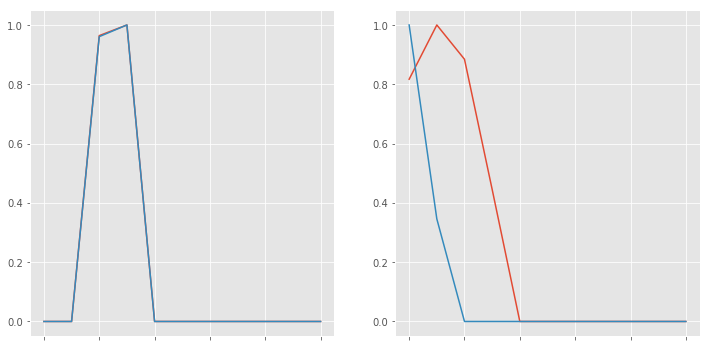

In [181]:
prot_1 = 'Tb927.4.2200'
prot_2 = 'Tb927.9.5590'

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
temp=df_4.loc[prot_1]/df_4.loc[prot_1].max()
temp.plot(ax=axes[0], label='4 mm'+prot_1)
temp=df_4.loc[prot_2]/df_4.loc[prot_2].max()
temp.plot(ax=axes[0], label='4 mm'+prot_2)


temp = df_8.loc[prot_1]/df_8.loc[prot_1].max()
temp.plot(ax=axes[1], label='8 mm'+prot_1)
temp = df_8.loc[prot_2]/df_8.loc[prot_2].max()
temp.plot(ax=axes[1], label='8 mm'+prot_2)


In [166]:
df_8.loc['Tb927.4.3060']

LFQ intensity 1     14917000
LFQ intensity 2      2652100
LFQ intensity 3      2243300
LFQ intensity 4            0
LFQ intensity 5            0
LFQ intensity 6            0
LFQ intensity 7            0
LFQ intensity 8            0
LFQ intensity 9            0
LFQ intensity 10           0
max                        1
Name: Tb927.4.3060, dtype: int64

## Analysis at evidence level

In [ ]:
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt 
import pandas as pd


def print_result(start_df_shape, shape_before, df, what):
    removed = shape_before[0]- df.shape[0]
    removed_from_beginning = start_df_shape[0]-df.shape[0]
    if removed > 0:
        print ('removed ',removed, what) 
        print ('tot ', removed_from_beginning, ' entries removed')
        print ('---------------')
    else:
        print (what)
        print ('nothing removed')
        print ('---------------')
        
def clean(df):     
    before,start = df.shape,df.shape
    col = 'Reverse'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
        
    before = df.shape
    col = 'Potential contaminant'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
    
    return df
    
evi_8 = pd.read_csv('increase_concentration/combined/txt/evidence.txt',sep='\t')
pep_8 = pd.read_csv('increase_concentration/combined/txt/peptides.txt',sep='\t')

df['logScore']=np.log10(df['Score'])
df = clean(df)
print (df.shape)
df['count_pep']=1
evi_4 = df[['DSSTP_K','DSSTP_n_term','count_pep','Fraction']].groupby(["Fraction"]).sum()
evi_4['fc_DSSTP_K']=evi_4['DSSTP_K']/evi_4['count_pep']
evi_4['fc_DSSTP_n_term']=evi_4['DSSTP_n_term']/evi_4['count_pep']
evi_4['Fraction']=temp.index.values

In [76]:
evi_8 = pd.read_csv('increase_concentration/combined/txt/evidence.txt',sep='\t')
pep_8 = pd.read_csv('increase_concentration/combined/txt/peptides.txt',sep='\t')
pep_8['Proteins']=[utilities.clean_id(n) for n in pep_8['Leading razor protein']]
pep_8 = pep_8[pep_8['Proteins'].isin(common)]
evi_8 = evi_8[evi_8['Protein group IDs'].isin(pep_8['Protein group IDs'])]
print (evi_8.shape)

(197054, 66)


In [77]:
evi_4 = pd.read_csv('test_small/evidence.txt',sep='\t')
pep_4 = pd.read_csv('test_small/peptides.txt',sep='\t')
pep_4['Proteins']=[utilities.clean_id(n) for n in pep_4['Leading razor protein']]
pep_4 = pep_4[pep_4['Proteins'].isin(common)]
evi_4 = evi_4[evi_4['Protein group IDs'].isin(pep_4['Protein group IDs'])]
print (evi_4.shape)

(110260, 66)


In [78]:
evi_8['count_pep']=1
temp_8 = evi_8[['DSSTP_K','DSSTP_n_term','count_pep','Fraction']].groupby(["Fraction"]).sum()
temp_8['fc_DSSTP_K']=temp_8['DSSTP_K']/temp_8['count_pep']
temp_8['fc_DSSTP_n_term']=temp_8['DSSTP_n_term']/temp_8['count_pep']
temp_8['Fraction']=temp_8.index.values

In [79]:
evi_4['count_pep']=1
temp_4 = evi_4[['DSSTP_K','DSSTP_n_term','count_pep','Fraction']].groupby(["Fraction"]).sum()
temp_4['fc_DSSTP_K']=temp_4['DSSTP_K']/temp_4['count_pep']
temp_4['fc_DSSTP_n_term']=temp_4['DSSTP_n_term']/temp_4['count_pep']
temp_4['Fraction']=temp_4.index.values

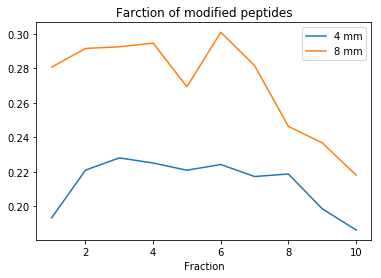

In [86]:
fig,ax=plt.subplots()
temp_4.plot(x='Fraction',y='fc_DSSTP_K',ax=ax, label='4 mm')
temp_8.plot(x='Fraction',y='fc_DSSTP_K',ax=ax, label='8 mm')
plt.title('Farction of modified peptides')
plt.show()

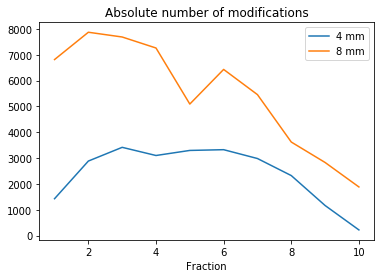

In [85]:
fig,ax=plt.subplots()
temp_4.plot(x='Fraction',y='DSSTP_K',ax=ax, label='4 mm')
temp_8.plot(x='Fraction',y='DSSTP_K',ax=ax, label='8 mm')
plt.title('Absolute number of modifications')
plt.show()

In [93]:
evi_4.head()

,DSSTP_K,DSSTP_n_term,count_pep,fc_DSSTP_K,fc_DSSTP_n_term,Fraction
Fraction,,,,,,
1,1427,19,7379,0.193387,0.002575,1
2,2884,25,13048,0.221030,0.001916,2
3,3415,27,14969,0.228138,0.001804,3
4,3099,29,13764,0.225153,0.002107,4
5,3295,27,14911,0.220978,0.001811,5


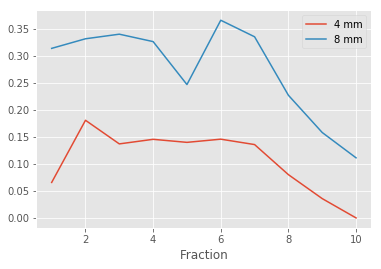

In [124]:
#tcomplex
prots = set([
'Tb927.11.16760',
'Tb927.10.8190',
'Tb927.11.14250',
'Tb927.8.3150',
'Tb927.11.3240',
'Tb927.11.1900'
])
evi_4['Proteins']=[utilities.clean_id(n) for n in evi_4['Proteins']]
selection_4 = evi_4[evi_4['Proteins'].isin(prots)]
#proteasome = df[df['proteasome'].isin(prots)]
selection_4 = selection_4[['Sequence','Fraction','DSSTP_K']]
selection_4['tot_detection']=1
selection_4 = selection_4[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection_4['fc_tcomplex']=selection_4['DSSTP_K']/selection_4['tot_detection']
selection_4['Fraction']=selection_4.index.values

evi_8['Proteins']=[utilities.clean_id(n) for n in evi_8['Proteins']]
selection_8 = evi_8[evi_8['Proteins'].isin(prots)]
#proteasome = df[df['proteasome'].isin(prots)]
selection_8 = selection_8[['Sequence','Fraction','DSSTP_K']]
selection_8['tot_detection']=1
selection_8 = selection_8[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection_8['fc_tcomplex']=selection_8['DSSTP_K']/selection_8['tot_detection']
selection_8['Fraction']=selection_8.index.values


fig,ax = plt.subplots()
selection_4.plot(x='Fraction',y='fc_tcomplex',ax=ax,label='4 mm')
selection_8.plot(x='Fraction',y='fc_tcomplex',ax=ax,label='8 mm' )
plt.show()

#temp['DSSTP_K'].value_counts()
#selection[['Fraction','DSSTP_K','tot_detection']].head()


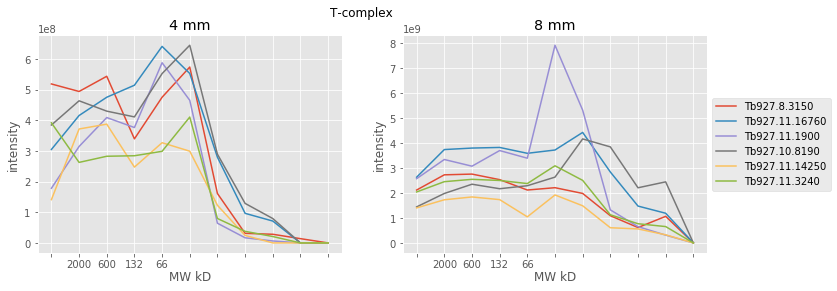

In [126]:
#a function to facilitate the line plot
#of a complex
def plot_line(df, ax, title, 
              new_ticks=['','2000','600','132','66','','','','',''],
              legend=False):
    plt.style.use('ggplot')
    #remove all zero entries
    df.fillna(0,inplace=True)
    df = df[(df.T != 0).any()]
    df.T.plot(ax=ax)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(1,4))
    ax.set_xticks( [n for n in range(df.shape[1])])
    ax.set_xticklabels( [n for n in range(df.shape[1])])
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),  
              fancybox=True, framealpha=0.5, fontsize = 'small')
    else:
        ax.legend_.remove()
    ax.set_xlabel('MW kD', labelpad=1)
    ax.set_ylabel('intensity', rotation=90)
    ax.set_title(title)
    ax.set_xticklabels(new_ticks)
    
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))    
plot_line(df_4.loc[prots], axes[0], '4 mm')
plot_line(df_8.loc[prots], axes[1], '8 mm')
#plot_line(df_4.loc[prots]/df_8.loc[prots], axes[2], '8 mm')
plt.suptitle('T-complex')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

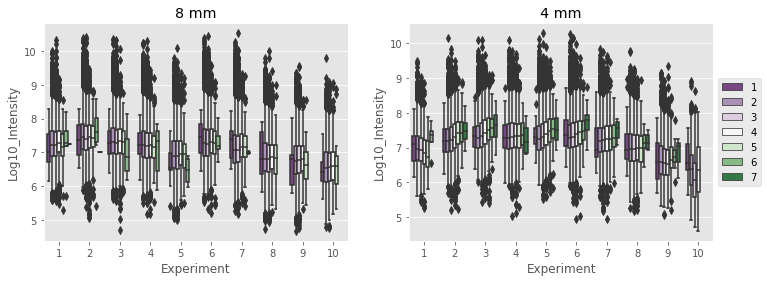

In [142]:
def make_plot(df=pd.DataFrame(), 
              x='', y='', hue='', ax='', 
              legend=False, title =False):
    import seaborn as sns
    #fig, ax = plt.subplots()
    sns.boxplot(x=x, y=y, hue=hue, data=df, palette="PRGn", ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if title:
        ax.set_title(title)
    else:
        ax.set_title(hue)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_visible(legend)
    #ax.legend.visible=False
    
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))   
evi_4['Log10_Intensity']=np.log10(evi_4['Intensity'])
evi_8['Log10_Intensity']=np.log10(evi_8['Intensity'])
make_plot(df=evi_8, x='Experiment', y='Log10_Intensity', hue='Charge',ax=axes[0], title='8 mm')
make_plot(df=evi_4, x='Experiment', y='Log10_Intensity', hue='Charge',ax=axes[1], legend=True, title='4 mm')
plt.show()


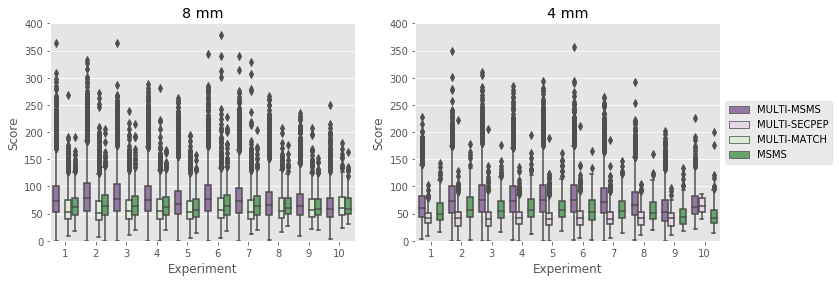

In [148]:
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))   
make_plot(df=evi_8, x='Experiment', y='Score', hue='Type',ax=axes[0], title='8 mm')
make_plot(df=evi_4, x='Experiment', y='Score', hue='Type',ax=axes[1], legend=True, title='4 mm')
axes[0].set_ylim(0,400)
axes[1].set_ylim(0,400)
plt.show()

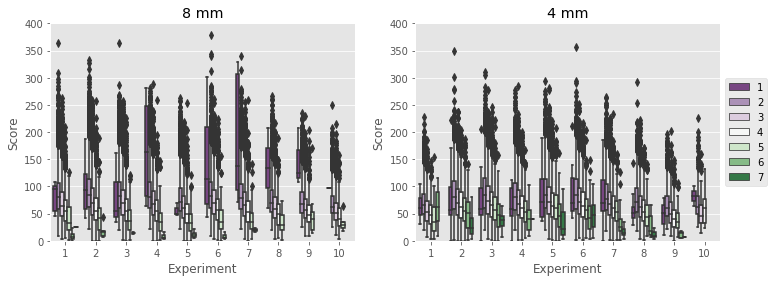

In [164]:
fig,axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))   
make_plot(df=evi_8, x='Experiment', y='Score', hue='Charge', ax=axes[0], title='8 mm')
make_plot(df=evi_4, x='Experiment', y='Score', hue='Charge', ax=axes[1], legend=True, title='4 mm')
axes[0].set_ylim(0,400)
axes[1].set_ylim(0,400)
plt.show()

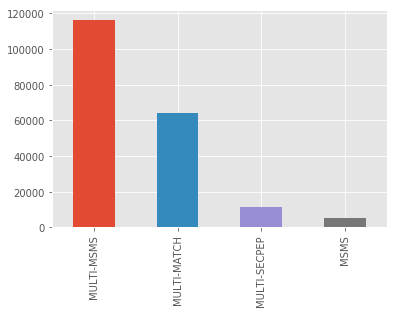

In [144]:
#The type of the feature (In case of label-free data there is no difference between 'MULTI' and 'ISO').
#'MSMS'         – for an MS/MS spectrum without an MS1 isotope pattern assigned.
#'ISO-MSMS'     – MS1 isotope cluster identified by MS/MS.
#'MULTI-MSMS'   – MS1 labeling cluster identified by MS/MS.
#'MULTI-SECPEP' – MS1 labeling cluster identified by MS/MS as second peptide.
#'MULTI-MATCH'  – MS1 labeling cluster identified by matching between runs.
evi_8['Type'].value_counts().plot(kind='bar')

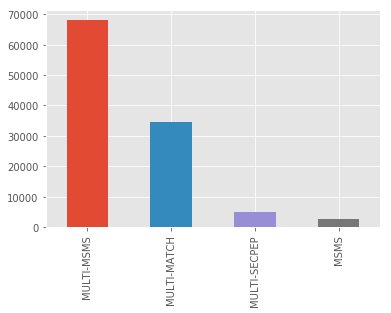

In [145]:
evi_4['Type'].value_counts().plot(kind='bar')

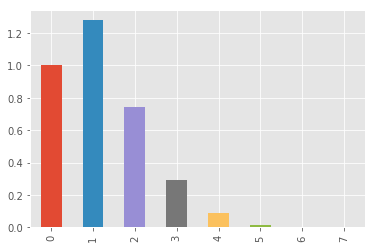

In [162]:
temp = evi_4['Missed cleavages'].value_counts()/evi_4['Missed cleavages'].value_counts().loc[0]
temp.sort_index(inplace=True)
temp.plot(kind='bar')

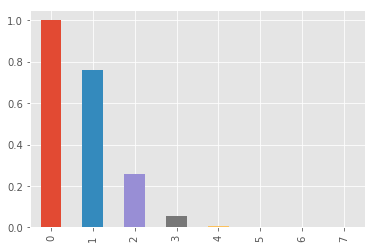

In [163]:
temp = evi_8['Missed cleavages'].value_counts()/evi_8['Missed cleavages'].value_counts().loc[0]
temp.sort_index(inplace=True)
temp.plot(kind='bar')